In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress

In [2]:
# Taking a look at the data base
composite_url = 'https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars'
api_key = "&apikey="

In [3]:
# Printing url
print(composite_url + api_key)

https://exoplanetarchive.ipac.caltech.edu/cgi-bin/nstedAPI/nph-nstedAPI?table=compositepars&apikey=


In [4]:
# Pulling necessary columns from NASA CSV and cleaning data with null values
nasa_original_df = pd.read_csv(composite_url)
nasa_filter_df = nasa_original_df[["fpl_hostname","fpl_letter","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age"]]
nasa_clean_df = nasa_filter_df.dropna(how='any')
nasa_clean_df.count()

fpl_hostname    332
fpl_letter      332
fpl_name        332
fpl_orbper      332
fpl_bmasse      332
fpl_rade        332
fpl_dens        332
fpl_eqt         332
fpl_insol       332
fst_optmag      332
fst_teff        332
fst_mass        332
fst_rad         332
fst_age         332
dtype: int64

In [5]:
# Pulling reference data in as a CSV and reading it as a DataFrame
phl = "PHL Habitable Exoplanets.csv"
phl_df = pd.read_csv(phl)
phl_df.head()

,Name,Type,Mass (ME),Radius (RE),Flux (SE),Teq (K),Period (days),Distance (ly),ESI
0,Teegarden's Star b,M-Warm Terran,1.05,NaN,1.15,264,4.9,12.0,0.95
1,TOI-700 d,M-Warm Terran,NaN,1.14,0.87,246,37.4,101.0,0.93
2,K2-72 e,M-Warm Terran,NaN,1.29,1.11,261,24.2,217.0,0.90
3,TRAPPIST-1 d,M-Warm Subterran,0.41,0.77,1.14,263,4.0,41.0,0.90
4,Kepler-1649 c,M-Warm Terran,NaN,1.06,0.75,237,19.5,301.0,0.90


In [6]:
# Converting Name column in reference data to a list for for loop check
phl_names = phl_df["Name"].tolist()
print(phl_names)

["Teegarden's Star b", 'TOI-700 d', 'K2-72 e', 'TRAPPIST-1 d', 'Kepler-1649 c', 'Proxima Cen b', 'GJ 1061 d', 'GJ 1061 c', 'Ross 128 b', 'GJ 273 b', 'TRAPPIST-1 e', 'Kepler-442 b', 'Wolf 1061 c', 'GJ 667 C c', 'GJ 667 C f', 'Kepler-1229 b', 'TRAPPIST-1 f', 'Kepler-62 f', "Teegarden's Star c", 'Kepler-186 f', 'GJ 667 C e', 'tau Cet f', 'TRAPPIST-1 g', 'GJ 682 b', 'Kepler-452 b', 'Kepler-62 e', 'Kepler-1652 b', 'Kepler-1544 b', 'Kepler-296 e', 'Kepler-283 c', 'K2-296 b', 'Kepler-1410 b', 'K2-3 d', 'Kepler-1638 b', 'Kepler-296 f', 'Kepler-440 b', 'Kepler-705 b', 'Kepler-1653 b', 'GJ 832 c', 'Kepler-1606 b', 'Kepler-1090 b', 'Kepler-61 b', 'K2-18 b', 'Kepler-443 b', 'Kepler-1701 b', 'Kepler-22 b', 'LHS 1140 b', 'Kepler-1552 b', 'K2-9 b', 'Kepler-1540 b', 'GJ 180 c', 'Kepler-1632 b', 'Kepler-298 d', 'GJ 163 c', 'HD 40307 g', 'K2-288 B b', 'GJ 3293 d', 'GJ 229 A c', 'Kepler-174 d', 'GJ 357 d']


In [7]:
# Checking to see how many exoplanets in reference data remain in NASA data
phl_name_list = []
for x in phl_names:
    if not (nasa_clean_df.loc[nasa_clean_df["fpl_name"] == x].empty):
        phl_name_list.append(x)
print(len(phl_name_list))

22


In [8]:
# Merging reference data and NASA data
phl_esi_df = phl_df[["Name","ESI"]]
nasa_merge_df = pd.merge(nasa_clean_df, phl_esi_df,left_on="fpl_name",right_on="Name",how="left")

# Pulling necessary columns from merged DF
nasa_clean_merge_df = nasa_merge_df[["fpl_hostname","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age","ESI"]]
nasa_clean_merge_df.head(5)

,fpl_hostname,fpl_name,fpl_orbper,fpl_bmasse,fpl_rade,fpl_dens,fpl_eqt,fpl_insol,fst_optmag,fst_teff,fst_mass,fst_rad,fst_age,ESI
0,HAT-P-9,HAT-P-9 b,3.922811,238.05467,15.614,0.342,1540.0,931.000,12.297,6350.0,1.28,1.34,1.6,NaN
1,HAT-P-25,HAT-P-25 b,3.652815,180.84527,12.722,0.483,1182.0,325.000,13.190,5519.0,1.01,0.92,3.2,NaN
2,HAT-P-29,HAT-P-29 b,5.723190,279.69040,13.115,0.790,1271.0,433.000,11.900,6087.0,1.45,1.30,2.2,NaN
3,HAT-P-32,HAT-P-32 b,2.150008,216.12440,22.194,0.108,1836.0,1841.000,11.289,6001.0,1.13,1.37,2.7,NaN
4,Kepler-117,Kepler-117 b,18.795923,29.87500,8.059,0.300,984.0,157.541,14.247,6150.0,1.13,1.61,5.3,NaN


In [9]:
#Isolated the columns needed for the graphs
phl_esi_df = phl_df[["Name","ESI"]]
graphs = pd.merge(nasa_filter_df, phl_esi_df,left_on="fpl_name",right_on="Name",how="left")

#Dropped null values to make sure all data was graphed as best as it could be
graphs2 = graphs[["fpl_hostname","fpl_name","fpl_orbper","fpl_bmasse","fpl_rade","fpl_dens","fpl_eqt","fpl_insol","fst_optmag","fst_teff","fst_mass","fst_rad","fst_age","ESI"]]
dropped = graphs2.dropna(subset = ['fpl_eqt' , 'ESI'])
dropped1 = graphs2.dropna(subset = ['fpl_insol' , 'ESI'])
dropped2 = graphs2.dropna(subset = ['fpl_bmasse' , 'ESI'])
dropped3 = graphs2.dropna(subset = ['fpl_rade' , 'ESI'])
dropped4 = graphs2.dropna(subset = ['fst_age' , 'ESI'])

In [51]:
#Setting graph number
count = 0

In [59]:
#Defined plot linear to condense code for each scatter plot to call later.
def plot_linear(x_values, y_values, title, text_coor, count):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coor,fontsize=15,color="red")
    print(f"r-value:{rvalue**2}")
    plt.savefig(f"images/scat{count}.png")
    plt.show()

r-value:0.13592049805168588


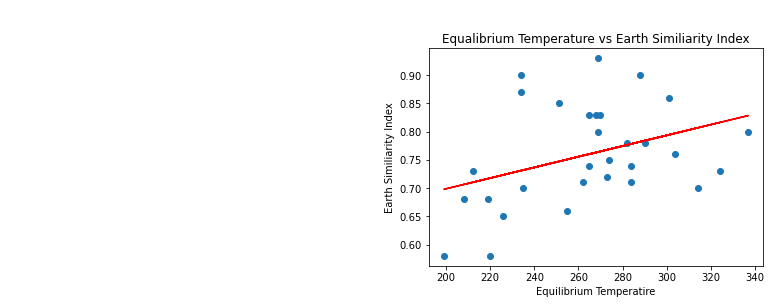

In [60]:
#Created scatter plot values and labels
x_values = dropped['fpl_eqt']
y_values = dropped["ESI"]
plt.xlabel('Equilibrium Temperatire')
plt.ylabel('Earth Similiarity Index')
plt.title('Equalibrium Temperature vs Earth Similiarity Index')
#Called in defined plot lineafrom cell above. 
plot_linear(x_values, y_values,'Max Temp',(1, 1),1)

r-value:0.0010782264078862925


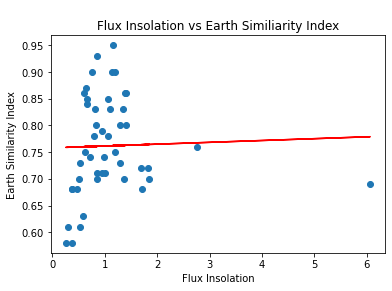

In [61]:
#Scatter plot 2
x_values = dropped1['fpl_insol']
y_values = dropped1['ESI']
plt.xlabel('Flux Insolation')
plt.ylabel('Earth Similarity Index')
plt.title('Flux Insolation vs Earth Similiarity Index')
plot_linear(x_values, y_values,'Max Temp',(1, 1), 2)

r-value:0.026164170851190275


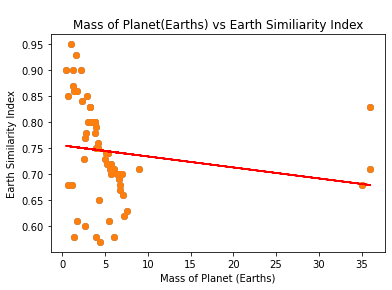

In [62]:
#Scatter Plot 3
x_values = dropped2['fpl_bmasse']
y_values = dropped2['ESI']
plt.scatter(x_values,y_values)
plt.xlabel('Mass of Planet (Earths)')
plt.ylabel('Earth Similarity Index')
plt.title('Mass of Planet(Earths) vs Earth Similiarity Index')
plot_linear(x_values, y_values,'Max Temp',(1, 1),3)

r-value:0.30943699232004784


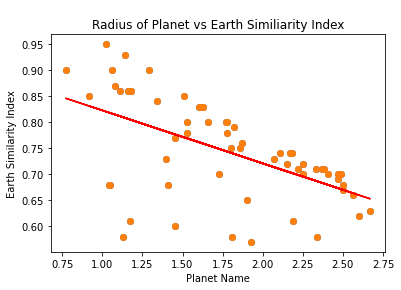

In [63]:
# Scatter Plot 4
x_values = dropped3['fpl_rade']
y_values = dropped3['ESI']
plt.scatter(x_values,y_values)
plt.xlabel('Planet Name')
plt.ylabel('Earth Similarity Index')
plt.title('Radius of Planet vs Earth Similiarity Index')
plot_linear(x_values, y_values,'Max Temp',(1, 1),4)

r-value:0.06188465217252551


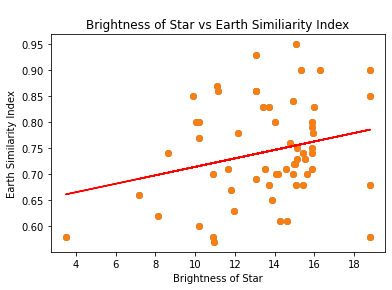

In [64]:
#Scatter Plot 5
x_values = dropped3['fst_optmag']
y_values = dropped3['ESI']
plt.scatter(x_values,y_values)
plt.xlabel('Brightness of Star')
plt.ylabel('Earth Similarity Index')
plt.title('Brightness of Star vs Earth Similiarity Index')
plot_linear(x_values, y_values,'Max Temp',(1, 1),5)

r-value:0.00010499153897492805


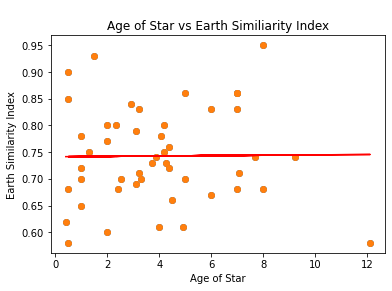

In [65]:
#Scatter Plot 6
x_values = dropped4['fst_age']
y_values = dropped4['ESI']
plt.scatter(x_values,y_values)
plt.xlabel('Age of Star')
plt.ylabel('Earth Similarity Index')
plt.title('Age of Star vs Earth Similiarity Index')
plot_linear(x_values, y_values,'Max Temp',(1, 1),6)

In [17]:
#Defined the T Test variables for the sample 
ttest = nasa_filter_df[nasa_filter_df['fpl_name'].isin(phl_names)]
ttest_clean = ttest.dropna(subset = ['fpl_eqt'])
ttest_mean = ttest_clean['fpl_eqt']

In [18]:
#Defined the T test variables for the entire population
ttesto = nasa_filter_df
ttesto_clean = ttesto.dropna(subset = ['fpl_eqt'])
ttesto_mean = ttesto_clean['fpl_eqt'].mean()

In [19]:
#Ran the T Test
stats.ttest_1samp(ttest_mean, ttesto_mean)

Ttest_1sampResult(statistic=-126.80781328613818, pvalue=2.341821736101518e-41)

In [20]:
#T Test 2
ttest1_clean = ttest.dropna(subset = ['fpl_insol'])
ttest1_mean = ttest1_clean['fpl_insol']


In [21]:
ttesto1_clean = ttesto.dropna(subset = ['fpl_insol'])
ttesto1_mean = ttesto1_clean['fpl_insol'].mean()


In [22]:
stats.ttest_1samp(ttest1_mean, ttesto1_mean)

Ttest_1sampResult(statistic=-2807.3974514967713, pvalue=4.893218605265058e-122)

In [23]:
#T Test 3
ttest2_clean = ttest.dropna(subset = ['fpl_bmasse'])
ttest2_mean = ttest2_clean['fpl_bmasse']

In [24]:
ttesto2_clean = ttesto.dropna(subset = ['fpl_insol'])
ttesto2_mean = ttesto2_clean['fpl_insol'].mean()

In [25]:
stats.ttest_1samp(ttest2_mean, ttesto2_mean)

Ttest_1sampResult(statistic=-375.87220976600435, pvalue=6.314662785996868e-100)

In [26]:
#T Test 4
ttest3_clean = ttest.dropna(subset = ['fpl_rade'])
ttest3_mean = ttest3_clean['fpl_rade']

In [27]:
ttesto3_clean = ttesto.dropna(subset = ['fpl_rade'])
ttesto3_mean = ttesto3_clean['fpl_rade'].mean()

In [28]:
stats.ttest_1samp(ttest3_mean, ttesto3_mean)

Ttest_1sampResult(statistic=-57.06395588587766, pvalue=1.175241089784333e-52)

In [29]:
T Test 5
ttest4_clean = ttest.dropna(subset = ['fst_optmag'])
ttest4_mean = ttest4_clean['fst_optmag']

In [30]:
ttesto4_clean = ttesto.dropna(subset = ['fst_optmag'])
ttesto4_mean = ttesto4_clean['fst_optmag'].mean()

In [31]:
stats.ttest_1samp(ttest4_mean, ttesto4_mean)

Ttest_1sampResult(statistic=2.453918897304653, pvalue=0.01715512153126336)

In [32]:
# T Test 6
ttest5_clean = ttest.dropna(subset = ['fst_age'])
ttest5_mean = ttest5_clean['fst_age']

In [33]:
ttesto5_clean = ttesto.dropna(subset = ['fst_age'])
ttesto5_mean = ttesto5_clean['fst_age'].mean()

In [34]:
stats.ttest_1samp(ttest5_mean, ttesto5_mean)

Ttest_1sampResult(statistic=-0.7601683160728223, pvalue=0.4509505588036282)